# Lecture 18: Convolutional Neural Networks (CNN)

MTU Spring 2024

Instructor: Abel Reyes

### Announcements

- HW6 grades on canvas
- Midterm grades on canvas
- Final course project guidelines on canvas.
- No Quiz this week
- HW7 deadlines is Wednesday 03/27/2024 by midnight

## Learning outcomes
- Your first CV model (Yay!)
- Understanding CNN
- What Conv nets learn

## Importing some libraries and dataset

In [1]:
import numpy as np
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Dataset

The training set you will be using is the CIFAR-10 dataset. It is a collection of 60,000 32x32 pixel images labelled to one of 10 different classes. Loading the dataset is just the matter of 3 lines of codes (or 1 if you don't count importing).

In [2]:
print(type(X_train))


<class 'numpy.ndarray'>


In [3]:
print(X_train.shape) # method to identify shape(size) of numpy.ndarray also known as a matrix


(50000, 32, 32, 3)


In [4]:
img1 = X_train[0, :, :, :] # : operator just means select all
print(img1.shape)

(32, 32, 3)


In [5]:
img1_again = X_train[0] # another way of selecting images
print(img1_again.shape)

(32, 32, 3)


In [6]:
img_exp = X_train[0:30] # selection of multiple images can be easily done this way
print(img_exp.shape)

(30, 32, 32, 3)


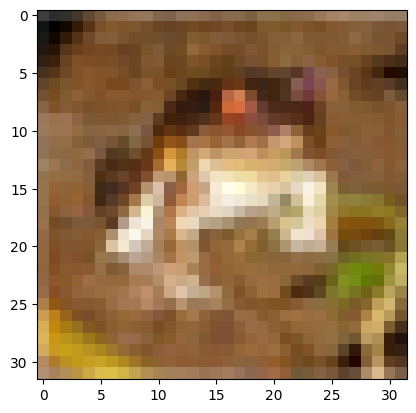

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img1)
plt.show()

In [8]:
print(y_train[:5]) # here we look at the first 5 elements of y_train


[[6]
 [9]
 [9]
 [4]
 [1]]


In [9]:
labels = {
	0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck'
} # remember img1 has label of 6, that corresponds to a frog

In [10]:
print(X_train.shape)
print(y_train.shape)


(50000, 32, 32, 3)
(50000, 1)


## Preprocessing

Preprocessing is an important step in building machine learning algorithms. There are things that you can do on both your X and y. Here we will explore 2 preprocessing techniques, mean-normalization and binary encoding.

### Mean-normalization
Image pixel values are usually of the datatype uint8 which means an integer between the range of 0 to 255. If we make use of such large numbers in our models, there can be possibility of overflow (what happens when numbers get too big and the machine fails to compute correctly). To reduce possibility of overflow, we scale our original values down to a decimal between 0 and 1. Doing so is easy, we just have to divide every term by 255, the highest possible value.


In [11]:
dtype_mult = 255.0
X_train = X_train.astype('float32') / dtype_mult

###  Binary encoding
We want to be able to generate a probability index of how likely an image is to belong to each different class. Therefore we make a separate prediction for each class. To do that we also have to do a modification to our y as demonstrated below!



In [12]:
import keras
from keras import layers

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)

print(y_train.shape)

(50000, 10)


In [13]:
print(y_train[:5])


[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(10000, 10)


## Building your first model


Keras is built using some other very popular deep learning libraries such as TensorFlow and CNTK as a backend. It acts as a wrapper to simplify the process of defining models and executing then. We shall get in more details later. This section will have less explanation and more examples, coding's more of a 'go figure it out yourself' kind of thing.

## Model building
Now is time to define the model. before we declare the model, lets set out a clearly defined structure for our model before actually coding things out. We shall refer to the terminologies as defined in the explanation of CNNs.

Layer number

    1 CONV1 3x3
    
    2 RELU
    
    3 CONV2 3x3
    
    4 RELU
    
    5 POOL1 2x2
    
    6 CONV3 3x3
    
    7 RELU
    
    8 CONV4 3x3
    
    9 RELU
    
    10 POOL2 2x2
    
    11 FC1 256
    
    12 FC2 10 (as there as 10 classes)
Now that that's out of the way, here is how you define all this in code.

In [15]:
model = keras.Sequential() # our defined model functions in some sort of sequence, we use the Sequential class to initialize our model before adding the layers

# Here's how you add layers to your model
# Conv1 32 32 (3) => 30 30 (32)
model.add(layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:])) # in layer 1 you need to specify input shape this is not needed in subsequent layers
model.add(layers.Activation('relu'))
# Conv2 30 30 (32) => 28 28 (32)
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
# Pool1 28 28 (32) => 14 14 (32)
model.add(layers.MaxPooling2D(pool_size=(2, 2))) # the CONV CONV POOL structure is popularized in during ImageNet 2014
model.add(layers.Dropout(0.25)) # this thing called dropout is used to prevent overfitting

# Conv3 14 14 (32) => 12 12 (64)
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
# Conv4 12 12 (64) => 6 6 (64)
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
# Pool2 6 6 (64) => 3 3 (64)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# FC layers 3 3 (64) => 576
model.add(layers.Flatten()) # to turn input into a 1 dimensional array
# Dense1 576 => 256
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
# Dense2 256 => 10
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax')) # the softmax layer will scale all values down to between 0 and 1 which represents probability index

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                        

In [17]:
optimizer = keras.optimizers.Adam() # Adam is one of many gradient descent formulas and one of the most popular


In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [19]:
nb_epoch = 200 # number of iterations to train on
batch_size = 128 # process entire image set by chunks of 128

history=model.fit(X_train, y_train, 
          batch_size=batch_size, 
          epochs=nb_epoch, validation_data=(X_test, y_test)) 
# be wawrned that the entire model can take over 4 hours to train if you are not using GPU


Epoch 1/200
391/391 [==============================] - 7s 8ms/step - loss: 1.7047 - accuracy: 0.3677 - val_loss: 182.1854 - val_accuracy: 0.3818
Epoch 2/200
391/391 [==============================] - 3s 7ms/step - loss: 1.2912 - accuracy: 0.5351 - val_loss: 200.3985 - val_accuracy: 0.3754
Epoch 3/200
391/391 [==============================] - 3s 7ms/step - loss: 1.1162 - accuracy: 0.6074 - val_loss: 204.8896 - val_accuracy: 0.4094
Epoch 4/200
391/391 [==============================] - 3s 7ms/step - loss: 0.9998 - accuracy: 0.6497 - val_loss: 136.3197 - val_accuracy: 0.4783
Epoch 5/200
391/391 [==============================] - 3s 7ms/step - loss: 0.9277 - accuracy: 0.6736 - val_loss: 117.0734 - val_accuracy: 0.5201
Epoch 6/200
391/391 [==============================] - 3s 7ms/step - loss: 0.8720 - accuracy: 0.6946 - val_loss: 163.2812 - val_accuracy: 0.4831
Epoch 7/200
391/391 [==============================] - 3s 7ms/step - loss: 0.8218 - accuracy: 0.7115 - val_loss: 118.8223 - val_ac

391/391 [==============================] - 3s 7ms/step - loss: 0.3906 - accuracy: 0.8597 - val_loss: 262.2548 - val_accuracy: 0.4922
Epoch 58/200
391/391 [==============================] - 3s 7ms/step - loss: 0.3893 - accuracy: 0.8620 - val_loss: 227.4478 - val_accuracy: 0.5403
Epoch 59/200
391/391 [==============================] - 3s 7ms/step - loss: 0.3849 - accuracy: 0.8624 - val_loss: 254.5054 - val_accuracy: 0.5074
Epoch 60/200
391/391 [==============================] - 3s 7ms/step - loss: 0.3814 - accuracy: 0.8650 - val_loss: 222.3353 - val_accuracy: 0.5500
Epoch 61/200
391/391 [==============================] - 3s 7ms/step - loss: 0.3817 - accuracy: 0.8622 - val_loss: 260.6456 - val_accuracy: 0.5349
Epoch 62/200
391/391 [==============================] - 3s 7ms/step - loss: 0.3844 - accuracy: 0.8613 - val_loss: 215.7032 - val_accuracy: 0.5420
Epoch 63/200
391/391 [==============================] - 3s 7ms/step - loss: 0.3854 - accuracy: 0.8647 - val_loss: 296.4654 - val_accuracy

391/391 [==============================] - 3s 8ms/step - loss: 0.3125 - accuracy: 0.8878 - val_loss: 295.4274 - val_accuracy: 0.5142
Epoch 114/200
391/391 [==============================] - 3s 8ms/step - loss: 0.3098 - accuracy: 0.8905 - val_loss: 284.4256 - val_accuracy: 0.5273
Epoch 115/200
391/391 [==============================] - 3s 8ms/step - loss: 0.3084 - accuracy: 0.8901 - val_loss: 285.9031 - val_accuracy: 0.5140
Epoch 116/200
391/391 [==============================] - 3s 8ms/step - loss: 0.3176 - accuracy: 0.8878 - val_loss: 299.4155 - val_accuracy: 0.4997
Epoch 117/200
391/391 [==============================] - 3s 8ms/step - loss: 0.3164 - accuracy: 0.8853 - val_loss: 321.6658 - val_accuracy: 0.5139
Epoch 118/200
391/391 [==============================] - 3s 8ms/step - loss: 0.3043 - accuracy: 0.8917 - val_loss: 351.2918 - val_accuracy: 0.4928
Epoch 119/200
391/391 [==============================] - 3s 8ms/step - loss: 0.3128 - accuracy: 0.8875 - val_loss: 276.2784 - val_ac

Epoch 169/200
391/391 [==============================] - 3s 8ms/step - loss: 0.2789 - accuracy: 0.9008 - val_loss: 296.1777 - val_accuracy: 0.5058
Epoch 170/200
391/391 [==============================] - 3s 8ms/step - loss: 0.2816 - accuracy: 0.9004 - val_loss: 263.1620 - val_accuracy: 0.5500
Epoch 171/200
391/391 [==============================] - 3s 8ms/step - loss: 0.2782 - accuracy: 0.9007 - val_loss: 356.9797 - val_accuracy: 0.4921
Epoch 172/200
391/391 [==============================] - 3s 8ms/step - loss: 0.2781 - accuracy: 0.9016 - val_loss: 295.0443 - val_accuracy: 0.5152
Epoch 173/200
391/391 [==============================] - 3s 8ms/step - loss: 0.2834 - accuracy: 0.9001 - val_loss: 298.5568 - val_accuracy: 0.5170
Epoch 174/200
391/391 [==============================] - 3s 8ms/step - loss: 0.2773 - accuracy: 0.9021 - val_loss: 256.0490 - val_accuracy: 0.5379
Epoch 175/200
391/391 [==============================] - 3s 8ms/step - loss: 0.2809 - accuracy: 0.9004 - val_loss: 272

In [22]:
# to save model weights
model.save_weights('convnet_weights.h5')

In [23]:
# to load model weights
model.load_weights('convnet_weights.h5')

## Learning curve

In [24]:
# Plotting the learning curves
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()



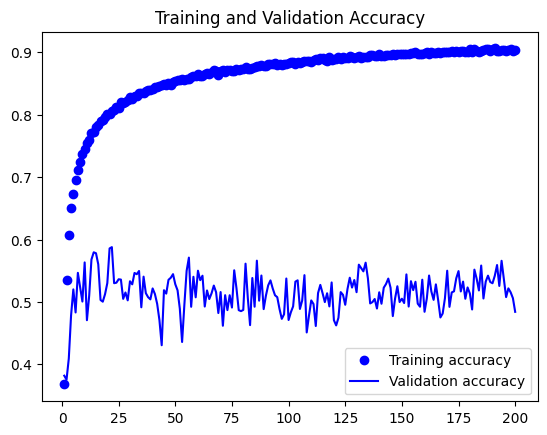

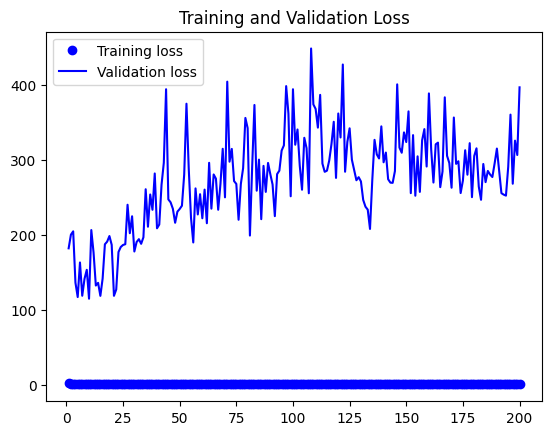

In [25]:
# Call this function with your history object
plot_learning_curves(history)

## Evaluation of the model

In [28]:
from sklearn.metrics import classification_report, confusion_matrix


In [26]:
# First, predict the classes with the model
y_pred = model.predict(X_test, batch_size=batch_size)
# Convert predictions classes from one hot vectors 
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert test observations to one hot vectors
y_true = np.argmax(y_test, axis=1)



79/79 [==============================] - 3s 42ms/step


In [29]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion Matrix')
print(cm)



Confusion Matrix
[[911  23   3   1   1   2   0   5  32  22]
 [ 68 829   0   0   0   0   0   0  36  67]
 [363  47 175  14  11  23  15 175  72 105]
 [279  27   9  97   3  54   4 227 136 164]
 [239  42  16  10  78   9  14 362  72 158]
 [158  22   6  25   0 287   2 320  50 130]
 [154  86   7  24   2  11 274  93 189 160]
 [119  11   1   2   0   6   0 754  15  92]
 [332  15   1   0   0   0   0   2 604  46]
 [ 71  82   0   0   0   0   0   4  11 832]]


In [30]:
# Classification Report
print('Classification Report')
print(classification_report(y_true, y_pred_classes))



Classification Report
              precision    recall  f1-score   support

           0       0.34      0.91      0.49      1000
           1       0.70      0.83      0.76      1000
           2       0.80      0.17      0.29      1000
           3       0.56      0.10      0.17      1000
           4       0.82      0.08      0.14      1000
           5       0.73      0.29      0.41      1000
           6       0.89      0.27      0.42      1000
           7       0.39      0.75      0.51      1000
           8       0.50      0.60      0.54      1000
           9       0.47      0.83      0.60      1000

    accuracy                           0.48     10000
   macro avg       0.62      0.48      0.43     10000
weighted avg       0.62      0.48      0.43     10000



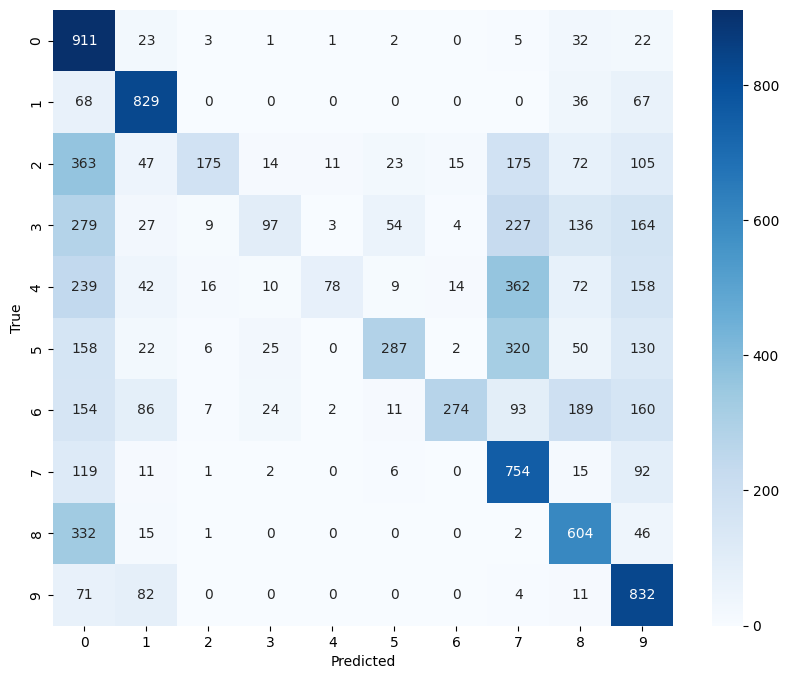

In [31]:
# If you want to visualize the confusion matrix, you can use the following code
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualizing what convnets learn
In this example, we look into what sort of visual patterns image classification models learn. We'll be using the ResNet50V2 model, trained on the ImageNet dataset.

Our process is simple: we will create input images that maximize the activation of specific filters in a target layer (picked somewhere in the middle of the model: layer conv3_block4_out). Such images represent a visualization of the pattern that the filter responds to.

[source](https://keras.io/examples/vision/visualizing_what_convnets_learn/)

In [3]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras import applications


# The dimensions of our input image
img_width = 180
img_height = 180
# Our target layer: we will visualize the filters from this layer.
# See `model.summary()` for list of layer names, if you want to change this.
layer_name = "conv3_block4_out"

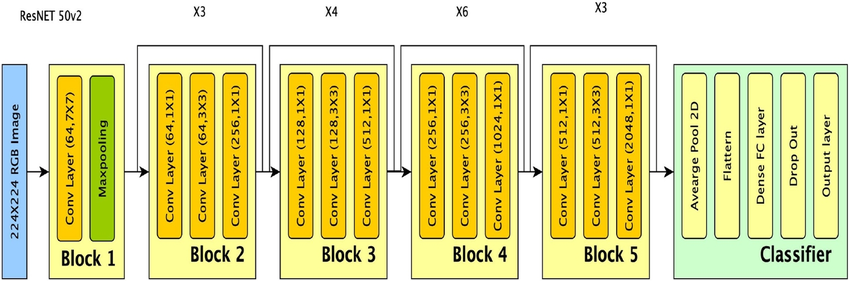

In [4]:
# Build a ResNet50V2 model loaded with pre-trained ImageNet weights
model = applications.ResNet50V2(weights="imagenet", include_top=False)

# Set up a model that returns the activation values for our target layer
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.inputs, outputs=layer.output)

In [5]:
def compute_loss(input_image, filter_index):
    activation = feature_extractor(input_image)
    # We avoid border artifacts by only involving non-border pixels in the loss.
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

In [6]:
@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return loss, img

## Set up the end-to-end filter visualization loop
Our process is as follow:

Start from a random image that is close to "all gray" (i.e. visually netural)
Repeatedly apply the gradient ascent step function defined above
Convert the resulting input image back to a displayable form, by normalizing it, center-cropping it, and restricting it to the [0, 255] range.

In [7]:
def initialize_image():
    # We start from a gray image with some random noise
    img = tf.random.uniform((1, img_width, img_height, 3))
    # ResNet50V2 expects inputs in the range [-1, +1].
    # Here we scale our random inputs to [-0.125, +0.125]
    return (img - 0.5) * 0.25


def visualize_filter(filter_index):
    # We run gradient ascent for 20 steps
    iterations = 30
    learning_rate = 10.0
    img = initialize_image()
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, filter_index, learning_rate)

    # Decode the resulting input image
    img = deprocess_image(img[0].numpy())
    return loss, img

def deprocess_image(img):
    # Normalize array: center on 0., ensure variance is 0.15
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    # Center crop
    img = img[25:-25, 25:-25, :]

    # Clip to [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Convert to RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img


In [12]:
from IPython.display import Image, display

loss, img = visualize_filter(3)
keras.utils.save_img("0.png", img)

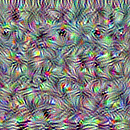

In [13]:
display(Image("0.png"))


## Visualize the first 64 filters in the target layer
Now, let's make a 8x8 grid of the first 64 filters in the target layer to get of feel for the range of different visual patterns that the model has learned.

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31
Processing filter 32
Processing filter 33
Processing filter 34
Processing filter 35
Processing filter 36
Processing filter 37
Processing filter 38
Processing filter 39
Processing filter 40
Processing filter 41
Processing filter 42
Processing filter 43
Processing filter 44
Processing filter 45
Processing filter 46
Processing filter 47
Pr

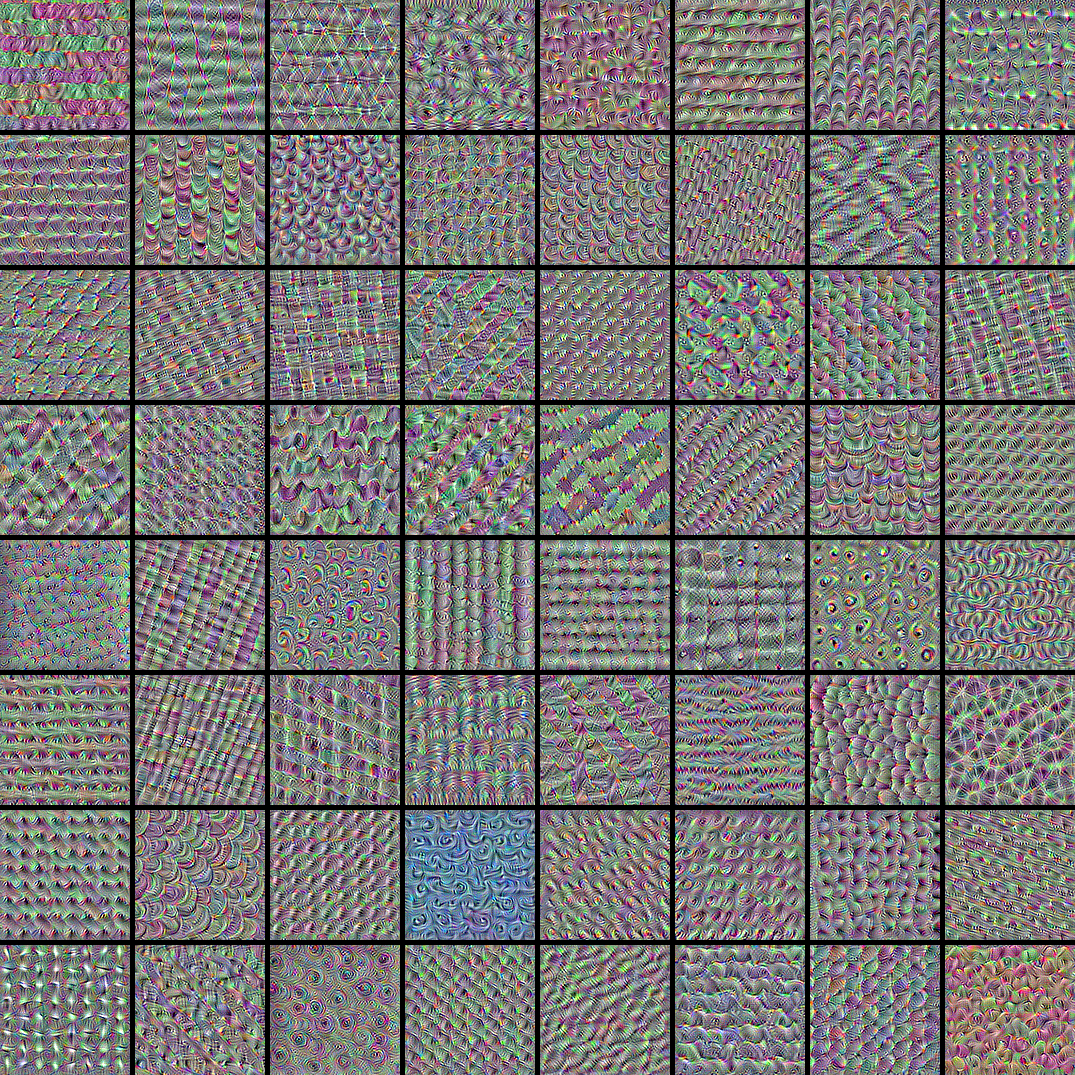

In [30]:
# Compute image inputs that maximize per-filter activations
# for the first 64 filters of our target layer
all_imgs = []
for filter_index in range(64):
    print("Processing filter %d" % (filter_index,))
    loss, img = visualize_filter(filter_index)
    all_imgs.append(img)

# Build a black picture with enough space for
# our 8 x 8 filters of size 128 x 128, with a 5px margin in between
margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# Fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img = all_imgs[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = img
keras.utils.save_img("stiched_filters.png", stitched_filters)

from IPython.display import Image, display

display(Image("stiched_filters.png"))